In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("outputs/encuesta_agregada.xlsx",
                  parse_dates=[1, 85])

In [4]:
df.head()

,Nombre del encuestador,Fecha de la entrevista,Nombre de la persona entrevistada,Télefono de la persona entrevistada,Provincia donde vive,Distrito donde vive,Distrito donde vive.1,Distrito donde vive.2,"Tipo de ubicacion: Manzana (Mz), Lote, Urbanizacion (urb) y/o Etapa.",Tipo de vía,...,consume_alimento_orig_animal_leche,freq_consumo_consume_alimento_orig_animal_leche,consume_alimento_orig_animal_pescado,freq_consumo_consume_alimento_orig_animal_pescado,consume_alimento_orig_animal_pollo,freq_consumo_consume_alimento_orig_animal_pollo,consume_alimento_orig_animal_res,freq_consumo_consume_alimento_orig_animal_res,consume_alimento_orig_animal_otros,freq_consumo_consume_alimento_orig_animal_otros
0,SCH,2023-02-17,Ivana Guadalupe Elias Jimenez,978298638,Chincha,NaN,NaN,Pueblo Nuevo,"AAHH. NUEVO CHINCHA MZ ""J"" LOTE 1","Otro, especificar",...,0,0.0,0,0,1,1,0,0.0,0,0
1,SCH,2023-02-06,MARIA EUGENIA MAGALLANEZ PEÑA,903033657,Chincha,NaN,NaN,Chincha Alta,UPIS SAN AGUSTIN G-32,"Otro, especificar",...,1,2.0,0,0,0,0,0,0.0,0,0
2,SCH,2023-02-06,Breidy Sarahy Reyes Navarro,936626478,Chincha,NaN,NaN,Pueblo Nuevo,GROCIO PRADO,AV (Avenida),...,1,0.0,1,0,1,2,1,0.0,0,0
3,JF,2023-02-08,Evelyn Darihana Peña Becerra,91600524,Ica,Parcona,NaN,NaN,Av. Avomayo #254,AV (Avenida),...,0,0.0,0,0,0,0,0,0.0,0,0
4,PV,2023-02-16,Maribel Coromoto Azuaje Caldera,937691826,Pisco,NaN,Pisco,NaN,NaN,CA (Calle),...,0,0.0,0,0,1,5,0,0.0,0,0


In [6]:
df["Provincia donde vive"].unique()

array(['Chincha', 'Ica', 'Pisco', nan], dtype=object)

In [7]:
df["Provincia donde vive"].isna().sum()

6

In [8]:
df[df["Provincia donde vive"].isna()]

,Nombre del encuestador,Fecha de la entrevista,Nombre de la persona entrevistada,Télefono de la persona entrevistada,Provincia donde vive,Distrito donde vive,Distrito donde vive.1,Distrito donde vive.2,"Tipo de ubicacion: Manzana (Mz), Lote, Urbanizacion (urb) y/o Etapa.",Tipo de vía,...,consume_alimento_orig_animal_leche,freq_consumo_consume_alimento_orig_animal_leche,consume_alimento_orig_animal_pescado,freq_consumo_consume_alimento_orig_animal_pescado,consume_alimento_orig_animal_pollo,freq_consumo_consume_alimento_orig_animal_pollo,consume_alimento_orig_animal_res,freq_consumo_consume_alimento_orig_animal_res,consume_alimento_orig_animal_otros,freq_consumo_consume_alimento_orig_animal_otros
889,A.D.C.T,2023-02-17,Aida Mercedes patache solano,951600909,NaN,NaN,NaN,NaN,"Nazca, las acacias Lot 11 11",NaN,...,0,0.0,0,0,0,0,0,0.0,0,0
1004,Nv,2023-02-17,Ana Rosa Peña Perez,956411174,NaN,NaN,NaN,NaN,Nazca,No cuenta con información,...,0,0.0,0,0,1,2,1,2.0,0,0
1005,Nv,2023-02-17,Ingrid Yajaira Villamizar,942769658,NaN,NaN,NaN,NaN,Nazca,No cuenta con información,...,0,0.0,0,0,0,0,0,0.0,0,0
1007,Nv,2023-02-17,Carlos Eduardo Marquez Cerrada,924893457,NaN,NaN,NaN,NaN,Nazca,No cuenta con información,...,0,0.0,0,0,1,4,0,0.0,0,0
1009,Nv,2023-02-17,Zulma Esther Carrillo Carrillo,917405964,NaN,NaN,NaN,NaN,Nazca,No cuenta con información,...,0,0.0,0,0,1,1,0,0.0,0,0
1012,NaN,2023-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0.0,0,0


In [10]:
df.loc[df["Provincia donde vive"].isna(), "Provincia donde vive"] = "Nazca"

In [11]:
df["Provincia donde vive"].unique()

array(['Chincha', 'Ica', 'Pisco', 'Nazca'], dtype=object)

[Text(0, 0, '1083'), Text(0, 0, '378'), Text(0, 0, '347'), Text(0, 0, '5')]

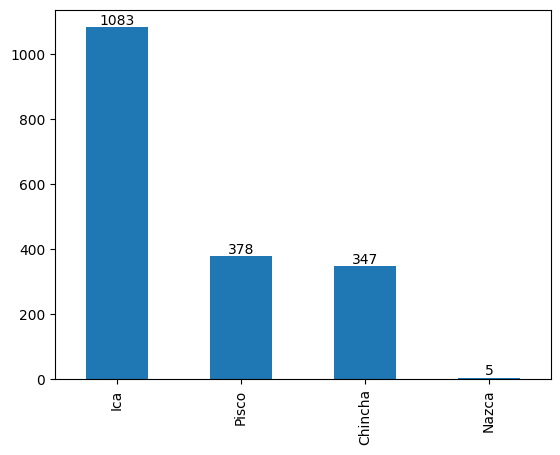

In [63]:
ax = df["Provincia donde vive"].value_counts().plot.bar()
ax.bar_label(ax.containers[0])

- Distrito -> Ica
- Distrito.1 -> Pisco
- Distrito.2 -> Chincha
- Distrito.3 -> Revisar

In [350]:
df.shape

(1813, 103)

In [18]:
df["Distrito donde vive.3"].isna().sum()

1814

In [20]:
df = df.drop("Distrito donde vive.3", axis=1)

In [24]:
df[df["Provincia donde vive"] == "Ica"]["Distrito donde vive"].isna().sum()

16

In [25]:
df[(df["Provincia donde vive"] == "Ica") & (df["Distrito donde vive"].isna())]

,Nombre del encuestador,Fecha de la entrevista,Nombre de la persona entrevistada,Télefono de la persona entrevistada,Provincia donde vive,Distrito donde vive,Distrito donde vive.1,Distrito donde vive.2,"Tipo de ubicacion: Manzana (Mz), Lote, Urbanizacion (urb) y/o Etapa.",Tipo de vía,...,consume_alimento_orig_animal_leche,freq_consumo_consume_alimento_orig_animal_leche,consume_alimento_orig_animal_pescado,freq_consumo_consume_alimento_orig_animal_pescado,consume_alimento_orig_animal_pollo,freq_consumo_consume_alimento_orig_animal_pollo,consume_alimento_orig_animal_res,freq_consumo_consume_alimento_orig_animal_res,consume_alimento_orig_animal_otros,freq_consumo_consume_alimento_orig_animal_otros
20,SCH,2023-02-12,ANGELA OSNEYRI CORDOVA ARRAEZ,935571396,Ica,NaN,NaN,NaN,MZ C LOTE 17,"Otro, especificar",...,1,1.0,1,1,1,2,1,0.0,0,0
478,SCH,2023-02-14,YIMEIDI GABRIELA CASTILLO JANETH,945679844,Ica,NaN,NaN,NaN,MZ L PUERTA 15,NaN,...,1,0.0,1,0,1,2,1,1.0,0,0
719,Victor lachezza,2023-02-16,Karla amararielis medinas perez,962436665,Ica,NaN,NaN,NaN,Urb San Joaquín Viejo,NaN,...,0,0.0,0,0,1,4,0,0.0,0,0
865,A.D.C.T,2023-02-17,Yaneth Daniela Ostos Suárez,975388448,Ica,NaN,NaN,NaN,"Nazca, pasaje 15, SAn Carlos 226",NaN,...,0,0.0,0,0,1,5,1,2.0,0,0
871,A.D.C.T,2023-02-17,Leisney Carolina Martínez blanco,912726317,Ica,NaN,NaN,NaN,"Nazca,",CA (Calle),...,0,0.0,0,0,1,5,0,0.0,0,0
873,A.D.C.T,2023-02-17,Yenifer José González dias,950159276,Ica,NaN,NaN,NaN,"Nazca,",CA (Calle),...,0,0.0,0,0,1,4,0,0.0,0,0
879,A.D.C.T,2023-02-17,Yoleidys Carolina Méndez refunfol,917106045,Ica,NaN,NaN,NaN,"Nazca. Tizanbra, orilla del rio",NaN,...,0,0.0,0,0,1,4,1,3.0,0,0
936,SC,2023-02-17,Angely Vanessa Pastrano Manchego,944772790,Ica,NaN,NaN,NaN,Urb,AV (Avenida),...,1,7.0,1,1,1,4,1,1.0,0,0
942,SC,2023-02-17,ALBA MARINA GOMEZ GOMEZ,943418869,Ica,NaN,NaN,NaN,Calle moqueta con arequipa,No cuenta con información,...,1,7.0,0,0,0,0,1,1.0,0,0
945,A.D.C.T,2023-02-17,Glorimar del Carmen Chirinos Riera,958863952,Ica,NaN,NaN,NaN,Palpa,No cuenta con información,...,0,0.0,0,0,0,0,0,0.0,0,0


In [27]:
df[(df["Provincia donde vive"] == "Pisco") & (df["Distrito donde vive.1"].isna())]

,Nombre del encuestador,Fecha de la entrevista,Nombre de la persona entrevistada,Télefono de la persona entrevistada,Provincia donde vive,Distrito donde vive,Distrito donde vive.1,Distrito donde vive.2,"Tipo de ubicacion: Manzana (Mz), Lote, Urbanizacion (urb) y/o Etapa.",Tipo de vía,...,consume_alimento_orig_animal_leche,freq_consumo_consume_alimento_orig_animal_leche,consume_alimento_orig_animal_pescado,freq_consumo_consume_alimento_orig_animal_pescado,consume_alimento_orig_animal_pollo,freq_consumo_consume_alimento_orig_animal_pollo,consume_alimento_orig_animal_res,freq_consumo_consume_alimento_orig_animal_res,consume_alimento_orig_animal_otros,freq_consumo_consume_alimento_orig_animal_otros
1213,E. C,2023-02-10,Graoben maifer Terán,967403072,Pisco,NaN,NaN,NaN,Calle San José mz 12 lote 2,NaN,...,0,0.0,0,0,1,3,1,2.0,0,0
1810,GRECIA,2023-02-09,ALEXANDRA CAROLINA RIVERO DE SERRANO,935194915,Pisco,NaN,NaN,NaN,URB. RENACER,CA (Calle),...,0,0.0,0,0,1,3,1,3.0,0,0


In [28]:
df[(df["Provincia donde vive"] == "Chincha") & (df["Distrito donde vive.2"].isna())]

,Nombre del encuestador,Fecha de la entrevista,Nombre de la persona entrevistada,Télefono de la persona entrevistada,Provincia donde vive,Distrito donde vive,Distrito donde vive.1,Distrito donde vive.2,"Tipo de ubicacion: Manzana (Mz), Lote, Urbanizacion (urb) y/o Etapa.",Tipo de vía,...,consume_alimento_orig_animal_leche,freq_consumo_consume_alimento_orig_animal_leche,consume_alimento_orig_animal_pescado,freq_consumo_consume_alimento_orig_animal_pescado,consume_alimento_orig_animal_pollo,freq_consumo_consume_alimento_orig_animal_pollo,consume_alimento_orig_animal_res,freq_consumo_consume_alimento_orig_animal_res,consume_alimento_orig_animal_otros,freq_consumo_consume_alimento_orig_animal_otros
834,SCH,2023-02-16,GENESIS ANDREINA RODRIGUEZ COLINA,917340847,Chincha,NaN,NaN,NaN,NaN,CA (Calle),...,1,7.0,0,0,1,3,0,0.0,0,0
837,SCH,2023-02-16,YUNNELIS COROMOTO AZOCAR GAMARDO,927602126,Chincha,NaN,NaN,NaN,MZ A LOTE 6,"Otro, especificar",...,0,0.0,0,0,1,0,1,1.0,0,0
1008,SCH,2023-02-17,ARANXA JASPE CALDERON,974880724,Chincha,NaN,NaN,NaN,NaN,"Otro, especificar",...,1,2.0,0,0,1,4,1,1.0,0,0
1204,E. C,2023-02-10,Sheila Alvarez,927923685,Chincha,NaN,NaN,NaN,Av victoria 230 alfrente del colegio cooperativo,NaN,...,0,0.0,1,5,1,3,0,0.0,0,0
1478,SCH,2023-02-08,ENDERLIS MARIA GALVEZ BEOMONT,901131835,Chincha,NaN,NaN,NaN,NaN,CA (Calle),...,0,0.0,1,1,1,4,0,0.0,0,0
1479,SCH,2023-02-08,ALBA MILAGROS GARCIA SUBERO,901052107,Chincha,NaN,NaN,NaN,NaN,AV (Avenida),...,0,0.0,0,0,1,6,0,0.0,0,0
1484,SCH,2023-02-08,DAYENLIT ALEXANDRA ARAUJO SILVA,924567587,Chincha,NaN,NaN,NaN,NaN,JR (Jirón),...,0,0.0,0,0,1,3,0,0.0,0,0


In [37]:
df["Distrito donde vive"] = (df["Distrito donde vive"]
 .fillna(df["Distrito donde vive.1"])
 .fillna(df["Distrito donde vive.2"])
)

In [39]:
# Verifica que nos nans por separado suman igual
7+2+16+6

31

In [40]:
# Esto comprueba que no se han sobrepuesto valores de las columnas
df["Distrito donde vive"].isna().sum()

31

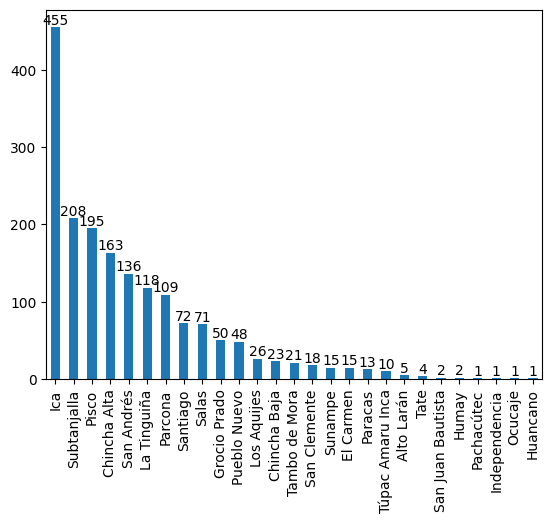

In [68]:
ax = df["Distrito donde vive"].value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

In [353]:
drop_cols = ["Distrito donde vive.1", "Distrito donde vive.2"]
df = df.drop(drop_cols, axis=1)

In [44]:
df["¿Cuál es SU sexo?"].unique()

array(['Femenino', 'Masculino', nan], dtype=object)

In [45]:
df["¿Cuál es SU sexo?"].isna().sum()

1

In [46]:
df[df["¿Cuál es SU sexo?"].isna()]

,Nombre del encuestador,Fecha de la entrevista,Nombre de la persona entrevistada,Télefono de la persona entrevistada,Provincia donde vive,Distrito donde vive,Distrito donde vive.1,Distrito donde vive.2,"Tipo de ubicacion: Manzana (Mz), Lote, Urbanizacion (urb) y/o Etapa.",Tipo de vía,...,consume_alimento_orig_animal_leche,freq_consumo_consume_alimento_orig_animal_leche,consume_alimento_orig_animal_pescado,freq_consumo_consume_alimento_orig_animal_pescado,consume_alimento_orig_animal_pollo,freq_consumo_consume_alimento_orig_animal_pollo,consume_alimento_orig_animal_res,freq_consumo_consume_alimento_orig_animal_res,consume_alimento_orig_animal_otros,freq_consumo_consume_alimento_orig_animal_otros
1012,NaN,2023-02-17,NaN,NaN,Nazca,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0.0,0,0


In [50]:
df.shape[1]

103

In [49]:
df.loc[1012].isna().sum()

79

In [53]:
round(df.loc[1012].isna().sum() / df.shape[1] * 100, 4)

76.699

In [56]:
df.iloc[1012][df.loc[1012].notna()]

Fecha de la entrevista                                         2023-02-17 00:00:00
Provincia donde vive                                                         Nazca
_id                                                                      219871864
n_miembros_menores                                                               0
n_miembros_adultos                                                               0
n_miembros_mayores                                                               0
n_miembros_femenino                                                              0
n_miembros_masculino                                                             0
consume_alimento_orig_animal_cerdo                                               0
freq_consumo_consume_alimento_orig_animal_cerdo                                0.0
consume_alimento_orig_animal_derivados lacteos                                   0
freq_consumo_consume_alimento_orig_animal_derivados lacteos                      0
cons

In [57]:
# Eliminar fila que tiene practicamente todos los valores nulos
df = df.drop(1012)

In [58]:
df["¿Cuál es SU sexo?"].unique()

array(['Femenino', 'Masculino'], dtype=object)

[Text(0, 0, '1621'), Text(0, 0, '192')]

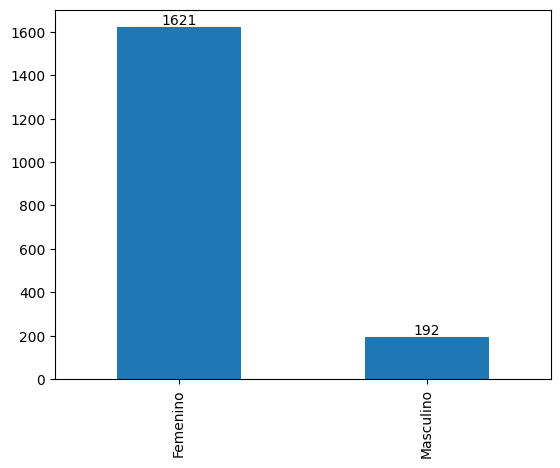

In [61]:
ax = df["¿Cuál es SU sexo?"].value_counts().plot.bar()
ax.bar_label(ax.containers[0])

In [70]:
df["¿Cual es su nivel educativo?"].unique()

array(['Primaria', 'Secundaria', 'Universitaria', 'Superior Técnico',
       'Posgrado (Doctorado)', 'Posgrado (Maestría)', 'No alfabetizado',
       nan], dtype=object)

In [72]:
df["¿Cual es su nivel educativo?"].isna().sum()

1

In [ ]:
df["¿Cual es su nivel educativo?"]

In [78]:
df[df["¿Cual es su nivel educativo?"].isna()][[
    "¿Cuál es SU sexo?",
    "¿Cual es su nivel educativo?",
    "¿Completó el nivel de educacion seleccionado?"]]

,¿Cuál es SU sexo?,¿Cual es su nivel educativo?,¿Completó el nivel de educacion seleccionado?
281,Femenino,NaN,Completa


In [81]:
df[df["¿Cuál es SU sexo?"] == "Femenino"]["¿Cual es su nivel educativo?"].describe()

count           1620
unique             7
top       Secundaria
freq            1047
Name: ¿Cual es su nivel educativo?, dtype: object

In [83]:
df[df["¿Cuál es SU sexo?"] == "Femenino"]["¿Cual es su nivel educativo?"].mode()

0    Secundaria
Name: ¿Cual es su nivel educativo?, dtype: object

In [84]:
df.loc[281, "¿Cual es su nivel educativo?"] = df[df["¿Cuál es SU sexo?"] == "Femenino"]["¿Cual es su nivel educativo?"].mode()[0]

In [85]:
df["¿Cual es su nivel educativo?"].unique()

array(['Primaria', 'Secundaria', 'Universitaria', 'Superior Técnico',
       'Posgrado (Doctorado)', 'Posgrado (Maestría)', 'No alfabetizado'],
      dtype=object)

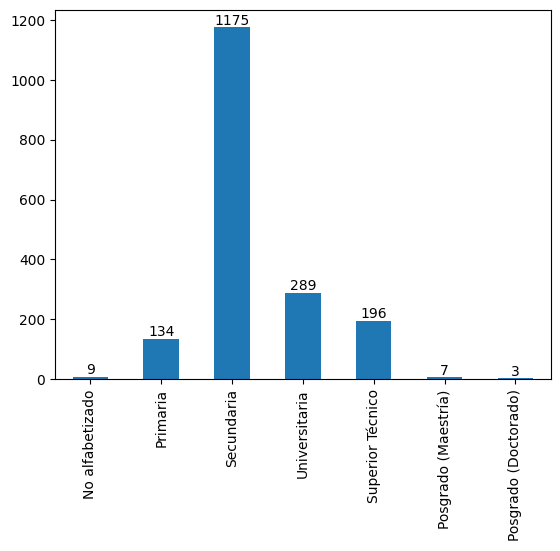

In [89]:
order = ['No alfabetizado', 'Primaria', 'Secundaria', 
         'Universitaria', 'Superior Técnico',
         'Posgrado (Maestría)', 'Posgrado (Doctorado)']
ax = df["¿Cual es su nivel educativo?"].value_counts()[order].plot.bar()
ax.bar_label(ax.containers[0]);

In [90]:
df["¿Completó el nivel de educacion seleccionado?"].unique()

array(['Incompleta', 'Completa', nan], dtype=object)

In [92]:
df[df["¿Completó el nivel de educacion seleccionado?"].isna()][[
    "¿Cuál es SU sexo?",
    "¿Cual es su nivel educativo?",
    "¿Completó el nivel de educacion seleccionado?"]]

,¿Cuál es SU sexo?,¿Cual es su nivel educativo?,¿Completó el nivel de educacion seleccionado?
4,Femenino,Secundaria,NaN
80,Femenino,Superior Técnico,NaN
176,Femenino,No alfabetizado,NaN
969,Femenino,No alfabetizado,NaN
1106,Femenino,No alfabetizado,NaN
1136,Masculino,No alfabetizado,NaN
1439,Femenino,Secundaria,NaN
1501,Femenino,No alfabetizado,NaN
1581,Masculino,No alfabetizado,NaN
1591,Femenino,No alfabetizado,NaN


In [95]:
df[df["¿Cual es su nivel educativo?"] == "No alfabetizado"][[
    "¿Cuál es SU sexo?",
    "¿Cual es su nivel educativo?",
    "¿Completó el nivel de educacion seleccionado?"]]

,¿Cuál es SU sexo?,¿Cual es su nivel educativo?,¿Completó el nivel de educacion seleccionado?
176,Femenino,No alfabetizado,NaN
904,Femenino,No alfabetizado,Incompleta
969,Femenino,No alfabetizado,NaN
1106,Femenino,No alfabetizado,NaN
1136,Masculino,No alfabetizado,NaN
1501,Femenino,No alfabetizado,NaN
1581,Masculino,No alfabetizado,NaN
1591,Femenino,No alfabetizado,NaN
1803,Femenino,No alfabetizado,NaN


In [97]:
df.loc[df["¿Cual es su nivel educativo?"] == "No alfabetizado", "¿Completó el nivel de educacion seleccionado?"] = "No alfabetizado"

In [98]:
df[df["¿Completó el nivel de educacion seleccionado?"].isna()][[
    "¿Cuál es SU sexo?",
    "¿Cual es su nivel educativo?",
    "¿Completó el nivel de educacion seleccionado?"]]

,¿Cuál es SU sexo?,¿Cual es su nivel educativo?,¿Completó el nivel de educacion seleccionado?
4,Femenino,Secundaria,NaN
80,Femenino,Superior Técnico,NaN
1439,Femenino,Secundaria,NaN
1698,Femenino,Secundaria,NaN


In [100]:
df[(df["¿Cuál es SU sexo?"] == "Femenino") & 
   (df["¿Cual es su nivel educativo?"] == "Secundaria")]["¿Completó el nivel de educacion seleccionado?"].describe()

count         1045
unique           2
top       Completa
freq           753
Name: ¿Completó el nivel de educacion seleccionado?, dtype: object

In [103]:
nivel_sec_completo_nan = ((df["¿Completó el nivel de educacion seleccionado?"].isna()) &
                          (df["¿Cual es su nivel educativo?"] == "Secundaria"))

In [112]:
df[(df["¿Cuál es SU sexo?"] == "Femenino") & 
   (df["¿Cual es su nivel educativo?"] == "Secundaria")]["¿Completó el nivel de educacion seleccionado?"].describe()

count         1048
unique           2
top       Completa
freq           756
Name: ¿Completó el nivel de educacion seleccionado?, dtype: object

In [114]:
df[(df["¿Cuál es SU sexo?"] == "Femenino") & 
   (df["¿Cual es su nivel educativo?"] == "Superior Técnico")]["¿Completó el nivel de educacion seleccionado?"].describe()

count          170
unique           2
top       Completa
freq           147
Name: ¿Completó el nivel de educacion seleccionado?, dtype: object

In [115]:
df.loc[df["¿Completó el nivel de educacion seleccionado?"].isna(), 
       "¿Completó el nivel de educacion seleccionado?"] = df[df["¿Cuál es SU sexo?"] == "Femenino"]["¿Completó el nivel de educacion seleccionado?"].mode()[0]

In [117]:
df["¿Completó el nivel de educacion seleccionado?"].isna().sum()

0

In [118]:
df["¿Completó el nivel de educacion seleccionado?"].unique()

array(['Incompleta', 'Completa', 'No alfabetizado'], dtype=object)

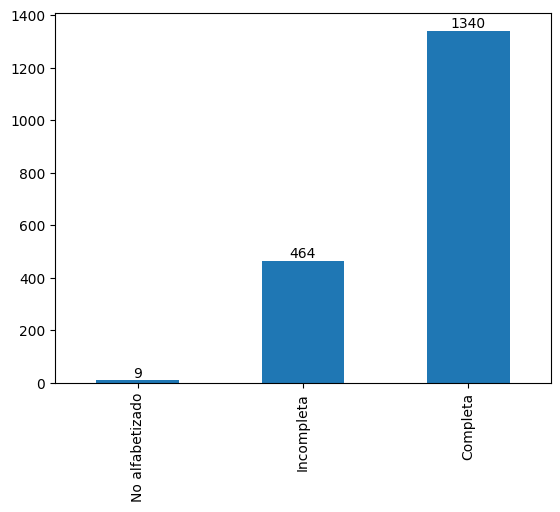

In [120]:
order = ['No alfabetizado', 'Incompleta', 'Completa']
ax = df["¿Completó el nivel de educacion seleccionado?"].value_counts()[order].plot.bar()
ax.bar_label(ax.containers[0]);

In [123]:
df["¿Usted es jefe del hogar?"].unique()

array(['NO', 'SÍ', nan], dtype=object)

In [124]:
df["¿Usted es jefe del hogar?"].isna().sum()

7

In [127]:
df[df["¿Usted es jefe del hogar?"].isna()][[
    "¿Cuál es SU DOCUMENTO VENEZOLANO?",
    "¿Cuál es SU actual ESTATUS MIGRATORIO?"
    
]]

,¿Cuál es SU DOCUMENTO VENEZOLANO?,¿Cuál es SU actual ESTATUS MIGRATORIO?
21,Cédula de identidiad,CPP
45,Cédula de identidiad,Carnet de Extranjeria
639,Pasaporte,Otro
805,Cédula de identidiad,Mantengo mi documento de identidad venezolano
862,Pasaporte,CPP
994,Pasaporte,Mantengo mi documento de identidad venezolano
997,Pasaporte,Mantengo mi documento de identidad venezolano


In [129]:
df["¿Usted es jefe del hogar?"] = df["¿Usted es jefe del hogar?"].fillna("NR")

In [130]:
df["¿Usted es jefe del hogar?"].unique()

array(['NO', 'SÍ', 'NR'], dtype=object)

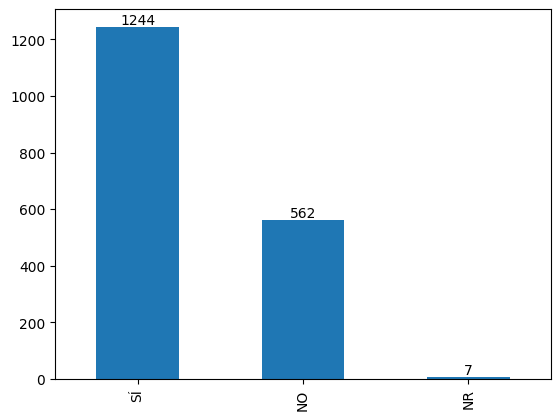

In [131]:
order = ['SÍ', 'NO', 'NR']
ax = df["¿Usted es jefe del hogar?"].value_counts()[order].plot.bar()
ax.bar_label(ax.containers[0]);

In [132]:
df["¿Cuál es SU DOCUMENTO VENEZOLANO?"].unique()

array(['Cédula de identidiad', 'Partida de nacimiento', 'Pasaporte',
       'No posee documento', nan], dtype=object)

In [147]:
df["¿Cuál es SU DOCUMENTO VENEZOLANO?"] = df["¿Cuál es SU DOCUMENTO VENEZOLANO?"].replace({'Cédula de identidiad': 'Cédula de identidad'})

In [148]:
df[df["¿Cuál es SU DOCUMENTO VENEZOLANO?"].isna()][[
    "¿Cuál es SU DOCUMENTO VENEZOLANO?",
    "¿Cuál es SU actual ESTATUS MIGRATORIO?",
    "Especifica otro estatus migratorio"
]]

,¿Cuál es SU DOCUMENTO VENEZOLANO?,¿Cuál es SU actual ESTATUS MIGRATORIO?,Especifica otro estatus migratorio
1098,NaN,NaN,NaN


In [149]:
df.loc[1698, "¿Cuál es SU DOCUMENTO VENEZOLANO?"] = "Cédula de identidad"

In [150]:
df.loc[[964, 1525], "¿Cuál es SU DOCUMENTO VENEZOLANO?"] = "No especificado"

In [156]:
df.loc[1098, "¿Cuál es SU DOCUMENTO VENEZOLANO?"] = "No especificado"

In [161]:
df["¿Cuál es SU DOCUMENTO VENEZOLANO?"].unique()

array(['Cédula de identidad', 'Partida de nacimiento', 'Pasaporte',
       'No posee documento', 'No especificado'], dtype=object)

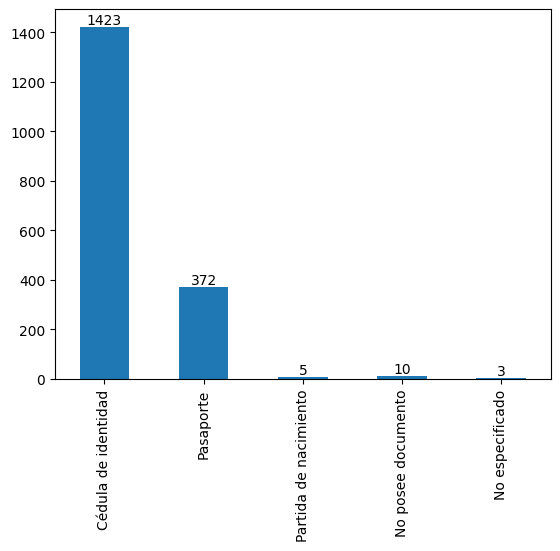

In [164]:
order = ['Cédula de identidad', 'Pasaporte',
         'Partida de nacimiento', 'No posee documento',
         'No especificado']
ax = df["¿Cuál es SU DOCUMENTO VENEZOLANO?"].value_counts()[order].plot.bar()
ax.bar_label(ax.containers[0]);

In [166]:
df["¿Cuál es SU actual ESTATUS MIGRATORIO?"].unique()

array(['Mantengo mi documento de identidad venezolano', 'Otro', 'CPP',
       'Carnet de Extranjeria', 'Carnet de Solicitud de Refugio', nan],
      dtype=object)

In [167]:
df["¿Cuál es SU actual ESTATUS MIGRATORIO?"].isna().sum()

67

In [170]:
df[df["¿Cuál es SU actual ESTATUS MIGRATORIO?"].isna()]["¿Cuál es SU DOCUMENTO VENEZOLANO?"].unique()

array(['Cédula de identidad', 'Pasaporte', 'No posee documento',
       'No especificado'], dtype=object)

In [171]:
df[df["¿Cuál es SU actual ESTATUS MIGRATORIO?"].isna()]["Especifica otro estatus migratorio"].unique()

array([nan], dtype=object)

In [172]:
df.loc[df["¿Cuál es SU actual ESTATUS MIGRATORIO?"].isna(), "¿Cuál es SU actual ESTATUS MIGRATORIO?"] = 'No especificado'

In [177]:
df["Especifica otro estatus migratorio"].sort_values().unique().tolist()

['CTP',
 'Cedula de Identidad',
 'Cedula de identidad',
 'Csrta de refugio',
 'DNI',
 'EN TRAMITE',
 'Mantiene pasaporte',
 'NACIONALIDAD',
 'NO TIENE',
 'No posee documento',
 'No tiene documento',
 'PASAPORTE',
 'PERDIO LA CÉDULA',
 'PPT',
 'PTP',
 'PTP VENCIDO... ACTUALIZANDO DATOS PARA CPP',
 'Pasaporte',
 'Ptp',
 'Sin documentos por perdido',
 'ccp',
 'naciolidad',
 nan]

In [187]:
to_replace = {
    'CPP': ['CTP', 'ccp', 'PPT', 'PTP', 'Ptp'],
    'Mantengo mi documento de identidad venezolano': ['Cedula de Identidad',
                                                      'Cedula de identidad',
                                                      'Mantiene pasaporte',
                                                      'PASAPORTE', 
                                                      'Pasaporte',
                                                      'NACIONALIDAD',
                                                      'naciolidad'],
    'Carnet de Solicitud de Refugio': ['Csrta de refugio'],
    'Documento de identidad peruano': ['DNI'],
    'No posee documentos': ['NO TIENE', 'No posee documento', 
                            'No tiene documento',
                            'EN TRAMITE', 'PTP VENCIDO... ACTUALIZANDO DATOS PARA CPP',
                            'PERDIO LA CÉDULA', 
                            'Sin documentos por perdido']
}
      
to_replace_dict = {e: k for k, el in to_replace.items() for e in el}

In [193]:
df[ "Especifica otro estatus migratorio"] = df[ "Especifica otro estatus migratorio"].replace(to_replace_dict)

In [194]:
df[ "Especifica otro estatus migratorio"].notna().sum()

50

In [192]:
(df["¿Cuál es SU actual ESTATUS MIGRATORIO?"] == "Otro").sum()

51

In [197]:
df[(df["¿Cuál es SU actual ESTATUS MIGRATORIO?"] == "Otro") &
   (df[ "Especifica otro estatus migratorio"].isna())][[
    "¿Cuál es SU DOCUMENTO VENEZOLANO?",
    "¿Cuál es SU actual ESTATUS MIGRATORIO?",
    "Especifica otro estatus migratorio"
]]

,¿Cuál es SU DOCUMENTO VENEZOLANO?,¿Cuál es SU actual ESTATUS MIGRATORIO?,Especifica otro estatus migratorio
1776,Pasaporte,Otro,NaN


In [205]:
(df[df["¿Cuál es SU actual ESTATUS MIGRATORIO?"] == "Otro"].index == 
 df[df[ "Especifica otro estatus migratorio"].notna()].index).all()

True

In [208]:
df["¿Cuál es SU actual ESTATUS MIGRATORIO?"] = (df["¿Cuál es SU actual ESTATUS MIGRATORIO?"]
                                                .replace({'Otro': np.nan})
                                                .fillna(df["Especifica otro estatus migratorio"])
                                               )

In [209]:
df["¿Cuál es SU actual ESTATUS MIGRATORIO?"].unique()

array(['Mantengo mi documento de identidad venezolano',
       'Documento de identidad peruano', 'CPP', 'Carnet de Extranjeria',
       'Carnet de Solicitud de Refugio', 'No especificado',
       'No posee documentos'], dtype=object)

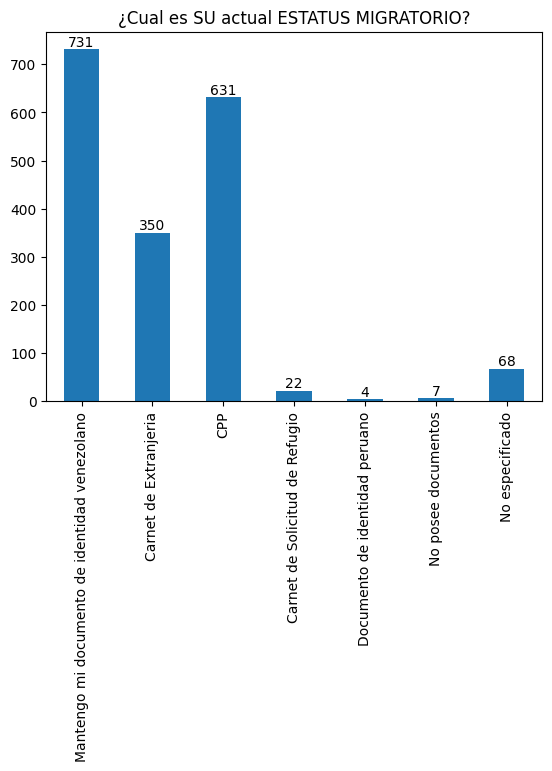

In [211]:
order = ['Mantengo mi documento de identidad venezolano',
        'Carnet de Extranjeria', 'CPP',
       'Carnet de Solicitud de Refugio', 'Documento de identidad peruano', 
       'No posee documentos', 'No especificado',]
ax = df["¿Cuál es SU actual ESTATUS MIGRATORIO?"].value_counts()[order].plot.bar()
ax.set_title("¿Cual es SU actual ESTATUS MIGRATORIO?")
ax.bar_label(ax.containers[0]);

In [216]:
df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"].unique()

array(['NO', 'SÍ', nan], dtype=object)

In [218]:
df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"].isna().sum()

59

In [ ]:
df["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"]

In [221]:
df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"].isna().sum()

57

In [220]:
df.loc[(df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"].isna()) & 
       (df["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"] == "SÍ"),
       "Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] = "SÍ"

In [222]:
df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"].isna().sum()

57

In [ ]:
df["¿Que modalidad de Qali Warma recibe su hijo?"]

In [224]:
df[df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"].isna()][[
    "Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?", 
    "¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?",
    "¿Que modalidad de Qali Warma recibe su hijo?"]].index

,"Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?",¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?,¿Que modalidad de Qali Warma recibe su hijo?
265,NaN,NaN,NaN
456,NaN,NaN,NaN
480,NaN,NaN,NaN
491,NaN,NaN,NaN
525,NaN,NaN,NaN
587,NaN,NaN,NaN
589,NaN,NaN,NaN
607,NaN,NaN,NaN
613,NaN,NaN,NaN
646,NaN,NaN,NaN


In [229]:
df.loc[df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"].isna(), [
    "Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?", 
    "¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?",
    "¿Que modalidad de Qali Warma recibe su hijo?"]] = 'Sin respuesta'

In [231]:
df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"].unique()

array(['NO', 'SÍ', 'Sin respuesta'], dtype=object)

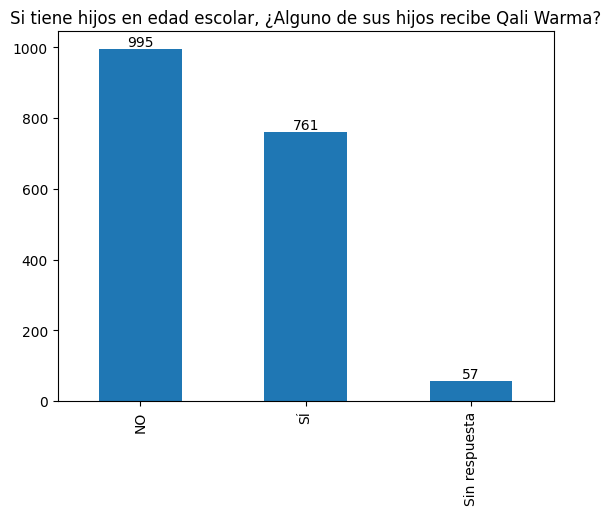

In [234]:
ax = df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"].value_counts().plot.bar()
ax.set_title("Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?")
ax.bar_label(ax.containers[0]);

In [256]:
df["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"].unique()

array(['No aplica', 'SÍ', 'NO', 'Sin respuesta'], dtype=object)

In [260]:
df["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"].isna().sum()

0

In [257]:
df[df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] == "NO"]["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"].unique()

array(['No aplica'], dtype=object)

In [242]:
df.loc[
    df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] == "NO",
    "¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"
] = 'No aplica'

In [258]:
df[df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] == "SÍ"]["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"].unique()

array(['SÍ', 'NO', 'Sin respuesta'], dtype=object)

In [259]:
df[df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] == "NO"]["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"].unique()

array(['No aplica'], dtype=object)

In [255]:
df[df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] == "SÍ"]["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"].unique()

array(['SÍ', 'NO', 'Sin respuesta'], dtype=object)

In [251]:
df[(df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] == "SÍ") & 
   (df["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"].isna())][[
    "Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?", 
    "¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?",
    "¿Que modalidad de Qali Warma recibe su hijo?"]]

,"Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?",¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?,¿Que modalidad de Qali Warma recibe su hijo?
1126,SÍ,NaN,Productos
1543,SÍ,NaN,NaN


In [253]:
df.loc[[1126, 1543], "¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"] = "Sin respuesta"

In [254]:
df.loc[1543, "¿Que modalidad de Qali Warma recibe su hijo?"] = "Sin respuesta"

In [263]:
df["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"].unique()

array(['No aplica', 'SÍ', 'NO', 'Sin respuesta'], dtype=object)

In [262]:
df["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"].isna().sum()

0

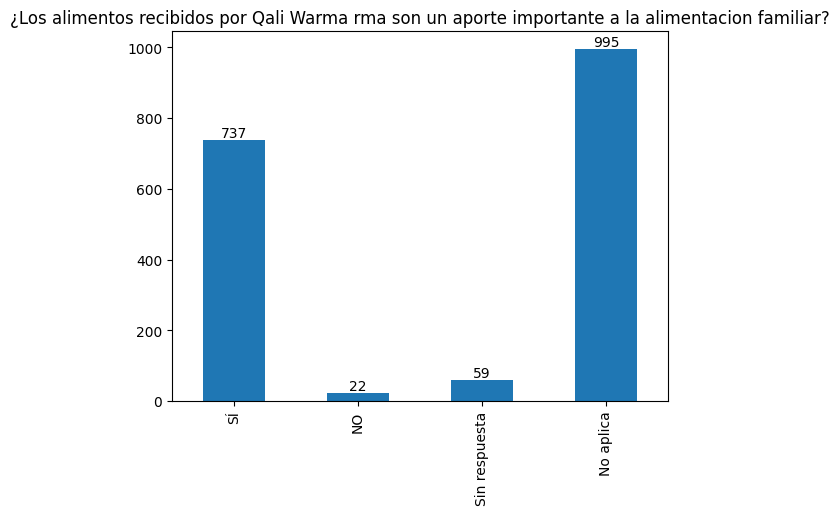

In [266]:
order = ["SÍ", "NO", "Sin respuesta", "No aplica"]
ax = df["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"].value_counts()[order].plot.bar()
ax.set_title("¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?")
ax.bar_label(ax.containers[0]);

In [268]:
df["¿Que modalidad de Qali Warma recibe su hijo?"].unique()

array(['Raciones', 'Productos', nan, 'Sin respuesta'], dtype=object)

In [269]:
df["¿Que modalidad de Qali Warma recibe su hijo?"].isna().sum()

1002

In [270]:
df[df["¿Que modalidad de Qali Warma recibe su hijo?"].isna()][[
    "Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?", 
    "¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?",
    "¿Que modalidad de Qali Warma recibe su hijo?"]]

,"Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?",¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?,¿Que modalidad de Qali Warma recibe su hijo?
2,NO,No aplica,NaN
3,NO,No aplica,NaN
7,NO,No aplica,NaN
8,NO,No aplica,NaN
9,NO,No aplica,NaN
...,...,...,...
1800,NO,No aplica,NaN
1803,NO,No aplica,NaN
1804,NO,No aplica,NaN
1807,NO,No aplica,NaN


In [273]:
df[df["¿Que modalidad de Qali Warma recibe su hijo?"].isna()][
      "Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"].unique()

array(['NO', 'SÍ'], dtype=object)

In [276]:
df[(df["¿Que modalidad de Qali Warma recibe su hijo?"].isna()) &
   (df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] == "NO")]["¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?"].unique()

array(['No aplica'], dtype=object)

In [277]:
df.loc[(df["¿Que modalidad de Qali Warma recibe su hijo?"].isna()) &
   (df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] == "NO"),
      "¿Que modalidad de Qali Warma recibe su hijo?"] = "No aplica"

In [280]:
df[df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] == "NO"]["¿Que modalidad de Qali Warma recibe su hijo?"].unique()

array(['Raciones', 'No aplica', 'Productos'], dtype=object)

In [283]:
df[(df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] == "NO") &
   (df["¿Que modalidad de Qali Warma recibe su hijo?"] != 'No aplica')][[
    "Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?", 
    "¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?",
    "¿Que modalidad de Qali Warma recibe su hijo?"]]

,"Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?",¿Los alimentos recibidos por Qali Warma rma son un aporte importante a la alimentacion familiar?,¿Que modalidad de Qali Warma recibe su hijo?
0,NO,No aplica,Raciones
26,NO,No aplica,Productos
122,NO,No aplica,Productos
224,NO,No aplica,Productos
320,NO,No aplica,Productos
332,NO,No aplica,Raciones
369,NO,No aplica,Productos
561,NO,No aplica,Productos
731,NO,No aplica,Productos
791,NO,No aplica,Productos


In [285]:
df.loc[df["Si tiene hijos en edad escolar, ¿Alguno de sus hijos recibe Qali Warma?"] == "NO",
       "¿Que modalidad de Qali Warma recibe su hijo?"] = "No aplica"

In [288]:
df["¿Que modalidad de Qali Warma recibe su hijo?"].unique()

array(['No aplica', 'Productos', 'Raciones', nan, 'Sin respuesta'],
      dtype=object)

In [290]:
df["¿Que modalidad de Qali Warma recibe su hijo?"].isna().sum()

25

In [293]:
df.loc[df["¿Que modalidad de Qali Warma recibe su hijo?"].isna(), 
      "¿Que modalidad de Qali Warma recibe su hijo?"] = 'Sin respuesta'

In [294]:
df["¿Que modalidad de Qali Warma recibe su hijo?"].unique()

array(['No aplica', 'Productos', 'Raciones', 'Sin respuesta'],
      dtype=object)

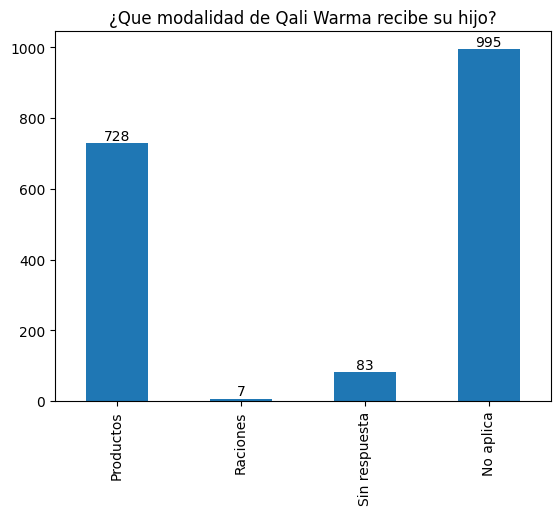

In [295]:
order = ['Productos', 'Raciones', 'Sin respuesta', 'No aplica',]
ax = df["¿Que modalidad de Qali Warma recibe su hijo?"].value_counts()[order].plot.bar()
ax.set_title("¿Que modalidad de Qali Warma recibe su hijo?")
ax.bar_label(ax.containers[0]);

In [296]:
df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"].unique()

array(['No tengo trabajo', 'NO', 'SÍ', nan, 'N'], dtype=object)

In [317]:
df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"] = df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"].replace({"N":"NO"})

In [318]:
df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"].unique()

array(['No tengo trabajo', 'NO', 'SÍ', nan], dtype=object)

In [320]:
df.loc[
    df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"] == "No tengo trabajo",
    "Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?"
    ] = "No aplica"

In [322]:
df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"].isna().sum()

9

In [ ]:
df["¿Podría decirnos a que se dedica?"]

In [305]:
df.columns[df.columns.str.startswith("Especificar")]

Index(['Especificar', 'Especificar.1', 'Especificar.2',
       'Especificar otra entidad de la que recibio ayuda',
       'Especificar otra forma de alimentacion colectiva',
       'Especificar otra forma de alimentacion colectiva.1', 'Especificar.3',
       'Especificar otra forma de alimentacion colectiva.2'],
      dtype='object')

In [323]:
df[df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"].isna()][[
    "Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?",
    "Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?",
    "¿Podría decirnos a que se dedica?",
    "Especificar.1"]]

,"Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?",Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?,¿Podría decirnos a que se dedica?,Especificar.1
77,NaN,SÍ,Venta ambulante de alimentos (Tipo 1).,NaN
142,NaN,SÍ,"Vendedor en mercado, bodega o similar (ej: ven...",NaN
190,NaN,NO,NaN,NaN
614,NaN,NaN,NaN,NaN
834,NaN,NO,NaN,NaN
1071,NaN,NO,NaN,NaN
1114,NaN,NO,NaN,NaN
1122,NaN,NaN,NaN,NaN
1435,NaN,SÍ,Venta ambulante de alimentos (Tipo 1).,NaN


In [326]:
df.loc[[77, 142, 1435], "Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"] = "No especifica"

In [328]:
df[df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"].isna()][[
    "Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?",
    "Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?",
    "¿Podría decirnos a que se dedica?",
    "Especificar.1"]]

,"Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?",Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?,¿Podría decirnos a que se dedica?,Especificar.1
190,NaN,NO,NaN,NaN
614,NaN,NaN,NaN,NaN
834,NaN,NO,NaN,NaN
1071,NaN,NO,NaN,NaN
1114,NaN,NO,NaN,NaN
1122,NaN,NaN,NaN,NaN


In [330]:
df.loc[[190, 834, 1071, 1114], "Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"] = "No especifica"

In [331]:
df[df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"].isna()][[
    "Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?",
    "Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?",
    "¿Podría decirnos a que se dedica?",
    "Especificar.1"]]

,"Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?",Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?,¿Podría decirnos a que se dedica?,Especificar.1
614,NaN,NaN,NaN,NaN
1122,NaN,NaN,NaN,NaN


In [332]:
df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"] = df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"].fillna("Sin respuesta")

In [333]:
df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"].unique()

array(['No tengo trabajo', 'NO', 'SÍ', 'No especifica', 'Sin respuesta'],
      dtype=object)

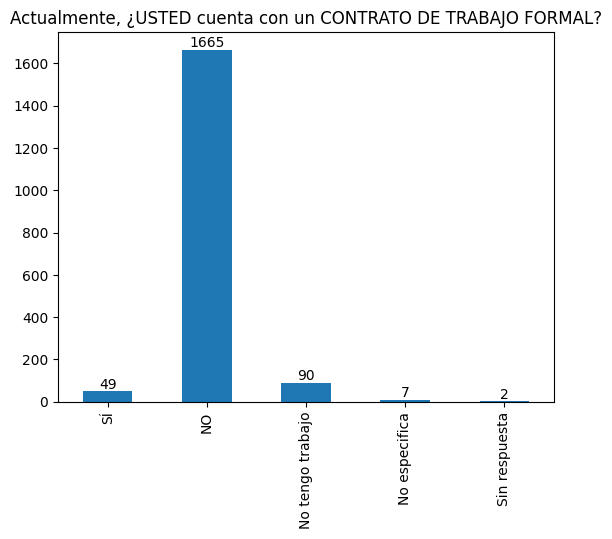

In [334]:
order = ['SÍ', 'NO', 'No tengo trabajo', 'No especifica', 'Sin respuesta']
ax = df["Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?"].value_counts()[order].plot.bar()
ax.set_title("Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?")
ax.bar_label(ax.containers[0]);

In [336]:
df["Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?"].unique()

array(['No aplica', nan, 'NO', 'SÍ'], dtype=object)

In [337]:
df["Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?"].isna().sum()

15

In [339]:
df[df["Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?"].isna()][[
    "Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?",
    "Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?",
    "¿Podría decirnos a que se dedica?",
    "Especificar.1"]]

,"Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?",Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?,¿Podría decirnos a que se dedica?,Especificar.1
1,NO,NaN,NaN,NaN
251,NO,NaN,NaN,NaN
522,NO,NaN,NaN,NaN
614,Sin respuesta,NaN,NaN,NaN
640,NO,NaN,NaN,NaN
1052,NO,NaN,NaN,NaN
1055,NO,NaN,NaN,NaN
1057,NO,NaN,NaN,NaN
1058,NO,NaN,NaN,NaN
1059,NO,NaN,NaN,NaN


In [340]:
df.loc[
    df["Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?"].isna(),
    ["Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?",
    "¿Podría decirnos a que se dedica?",
    "Especificar.1"]
] = 'Sin respuesta'

In [341]:
df["Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?"].unique()

array(['No aplica', 'Sin respuesta', 'NO', 'SÍ'], dtype=object)

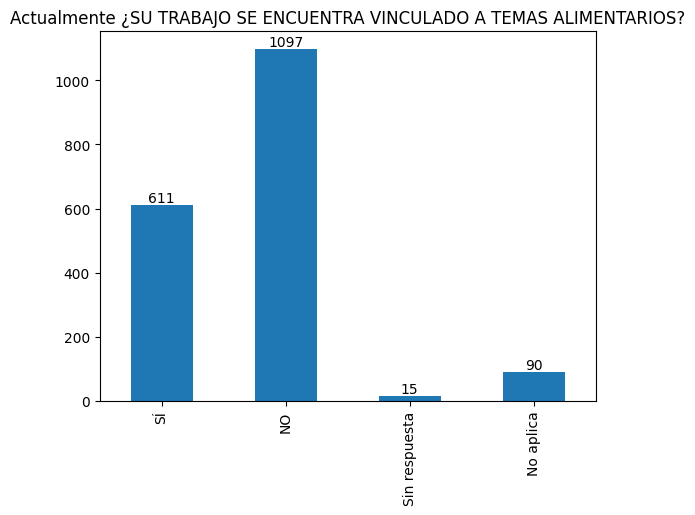

In [342]:
order = ['SÍ', 'NO', 'Sin respuesta', 'No aplica']
ax = df["Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?"].value_counts()[order].plot.bar()
ax.set_title("Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?")
ax.bar_label(ax.containers[0]);

In [354]:
df.to_excel("outputs/encuesta_limpieza_en_proceso_22_02_23.xlsx")

In [343]:
df["¿Podría decirnos a que se dedica?"].unique()

array([nan, 'Sin respuesta', 'Venta de alimentos no ambulante (Tipo 2)',
       'Trabajo en restaurante, PASTELERIA, PANADERIA (en cualquier actividad)',
       'Empleados en actividades alimentarias (avícolas, pescaderías, chacra, otros)',
       'Venta ambulante de alimentos (Tipo 1).', 'Delivery',
       'Vendedor en mercado, bodega o similar (ej: vendedor de helados)',
       'Otro, especificar',
       'Venta de alimentos con uno o más empleados (tipo 3)',
       'Cargador en mercado/estibador'], dtype=object)

In [344]:
df["¿Podría decirnos a que se dedica?"].isna().sum()

1182

In [348]:
df[df["¿Podría decirnos a que se dedica?"].isna()][[
    "Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?",
    "Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?",
    "¿Podría decirnos a que se dedica?",
    "Especificar.1"]]

,"Actualmente, ¿USTED cuenta con un CONTRATO DE TRABAJO FORMAL?",Actualmente ¿SU TRABAJO SE ENCUENTRA VINCULADO A TEMAS ALIMENTARIOS?,¿Podría decirnos a que se dedica?,Especificar.1
0,No tengo trabajo,No aplica,NaN,NaN
2,NO,NO,NaN,NaN
4,NO,NO,NaN,NaN
6,NO,NO,NaN,NaN
7,NO,NO,NaN,NaN
...,...,...,...,...
1803,NO,NO,NaN,NaN
1804,NO,NO,NaN,NaN
1805,NO,NO,NaN,NaN
1808,NO,NO,NaN,NaN
